# Object Oriented Programming 2 - examples and APIs


## Tasks Today:

   

1) <b>Restful APIs & HTTP Requests </b> <br>
 &nbsp;&nbsp;&nbsp;&nbsp; a) What are APIs <br>
  &nbsp;&nbsp;&nbsp;&nbsp; b) What does HTTP stand for, request methods, status codes <br>
 &nbsp;&nbsp;&nbsp;&nbsp; c) Making API requests and retrieving/jsonifying data <br>
 &nbsp;&nbsp;&nbsp;&nbsp; d) Using APIs requests within functions & classes <br>
 2) <b>Working with the Pokemon API </b> <br>
 &nbsp;&nbsp;&nbsp;&nbsp; a) Making Requests to the Pokemon API<br>
  &nbsp;&nbsp;&nbsp;&nbsp; b) Creating a function to make API Requests <br>
 &nbsp;&nbsp;&nbsp;&nbsp; c) Creating a Pokemon class and instantiating Pokemon objects<br>
 &nbsp;&nbsp;&nbsp;&nbsp; d) Create an Evolver class that inherits from Pokemon class <br>
 

# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [38]:
# making an API call
import requests

r = requests.get("https://pokeapi.co/api/v2/pokemon/charmander")
if r.status_code == 200:
    data = r.json()
else:
    print(r.status_code)
print(data.keys())
# keys we're working with are:
# abilities, name, types, weight


poke_dict = {
    'abilities': [
        {
            'ability': {
            'name': "blaze",
            'url': "https://pokeapi.co/api/v2/ability/66/"
        }
        },
         {
             'ability': {
            'name': "solar-power",
            'url': "https://pokeapi.co/api/v2/ability/94/"
             }
        }      
    ],
    'name': 'charmander',
    'weight': 85,
    'types': [
        {
            'type': {
                'name': 'fire',
                'url': 'https://pokeapi.co/api/v2/type/10/'
            }
        }
    ]
        
    
}
print(poke_dict['name'])
print(poke_dict['weight'])
print(poke_dict['abilities'][0]['ability']['name'])
print(poke_dict['types'][0]['type']['name'])
    

dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_abilities', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])
charmander
85
blaze
fire


### Display a Pokemon's name, weight, abilities, and types

In [6]:
r = requests.get("https://pokeapi.co/api/v2/pokemon/charmander")
if r.status_code == 200:
    data = r.json()
else:
    print(r.status_code)
# print(data.keys())

# get the pokemon name
name = data["name"] #data is now our dictionary with all th epokemon information
print(name)

charmander


In [10]:
# get types
print(data["types"])
types = [type_["type"]["name"] for type_ in data["types"]]
print(types)

[{'slot': 1, 'type': {'name': 'fire', 'url': 'https://pokeapi.co/api/v2/type/10/'}}]
['fire']


In [11]:
# get pokemon weight
weight = data["weight"]
print(weight)

85


In [15]:
# get pokemon abilities
print(data["abilities"])

abilities = [pokebility["ability"]["name"] for pokebility in data["abilities"]]
print(abilities)

[{'ability': {'name': 'blaze', 'url': 'https://pokeapi.co/api/v2/ability/66/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'solar-power', 'url': 'https://pokeapi.co/api/v2/ability/94/'}, 'is_hidden': True, 'slot': 3}]
['blaze', 'solar-power']


#### Create a function to Pull in your own Pokemon's data 

In [24]:
def poke_api_call(pokemon):
    r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{pokemon}")
    if r.status_code == 200:
        data = r.json()

        name = data["name"]
        types = [type_["type"]["name"] for type_ in data["types"]]
        abilities = [pokebility["ability"]["name"] for pokebility in data["abilities"]]
        weight = data["weight"]

        poke = {
            "name": name, 
            "types": types,
            "abilities": abilities,
            "weight": weight
        }

        return poke

In [20]:
poke_api_call("squirtle")

{'name': 'squirtle',
 'types': ['water'],
 'abilities': ['torrent', 'rain-dish'],
 'weight': 90}

In [21]:
poke_api_call("heracross")

{'name': 'heracross',
 'types': ['bug', 'fighting'],
 'abilities': ['swarm', 'guts', 'moxie'],
 'weight': 540}

In [22]:
poke_api_call("pichu")

{'name': 'pichu',
 'types': ['electric'],
 'abilities': ['static', 'lightning-rod'],
 'weight': 20}

Choose your pokemon

#### Use your function to create a dictionary of your favorite 6 pokemon

In [26]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
party = ['charizard', 'blastoise', 'gengar', 'magikarp', 'bulbasaur', 'arcanine']
my_six_pokemon = {}
for pokemon in party:
    poke_stats = poke_api_call(pokemon)
    my_six_pokemon[pokemon.title()] = poke_stats
    
print(my_six_pokemon)

{'Charizard': {'name': 'charizard', 'types': ['fire', 'flying'], 'abilities': ['blaze', 'solar-power'], 'weight': 905}, 'Blastoise': {'name': 'blastoise', 'types': ['water'], 'abilities': ['torrent', 'rain-dish'], 'weight': 855}, 'Gengar': {'name': 'gengar', 'types': ['ghost', 'poison'], 'abilities': ['cursed-body'], 'weight': 405}, 'Magikarp': {'name': 'magikarp', 'types': ['water'], 'abilities': ['swift-swim', 'rattled'], 'weight': 100}, 'Bulbasaur': {'name': 'bulbasaur', 'types': ['grass', 'poison'], 'abilities': ['overgrow', 'chlorophyll'], 'weight': 69}, 'Arcanine': {'name': 'arcanine', 'types': ['fire'], 'abilities': ['intimidate', 'flash-fire', 'justified'], 'weight': 1550}}


## Lets create a class called 'Pokemon' and create our pokemon as instances

In [39]:
class Pokemon:
    def __init__(self, name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = None
        self.poke_api_call()

    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name.lower()}")
        if r.status_code == 200:
            pokemon = r.json()
        else:
            print(f"Please check pokemon name spelling and try again: {r.staus_code}")
            return

        self.name = pokemon["name"]
        self.types = [type_["type"]["name"] for type_ in pokemon["types"]]
        self.weight = pokemon["weight"]
        self.abilities = [pokebility["ability"]["name"] for pokebility in pokemon["abilities"]]
        print(f"{self.name}'s data has been updated!")


    def __repr__(self): #string representation of our object, if not provided we get the object loaction in memory instead
        return f"You caught a {self.name}"
        
        

In [40]:
charmander = Pokemon("charmander")
print(charmander.__dict__)
print(charmander)
print(charmander.weight)

charmander's data has been updated!
{'name': 'charmander', 'types': ['fire'], 'abilities': ['blaze', 'solar-power'], 'weight': 85}
You caught a charmander
85


In [41]:
party = ['charizard', 'blastoise', 'gengar', 'magikarp', 'bulbasaur', 'arcanine']
pokedex = {}
for name in party:
    new = Pokemon(name)
    pokedex[name.title()] = new.__dict__
print(pokedex)

charizard's data has been updated!
blastoise's data has been updated!
gengar's data has been updated!
magikarp's data has been updated!
bulbasaur's data has been updated!
arcanine's data has been updated!
{'Charizard': {'name': 'charizard', 'types': ['fire', 'flying'], 'abilities': ['blaze', 'solar-power'], 'weight': 905}, 'Blastoise': {'name': 'blastoise', 'types': ['water'], 'abilities': ['torrent', 'rain-dish'], 'weight': 855}, 'Gengar': {'name': 'gengar', 'types': ['ghost', 'poison'], 'abilities': ['cursed-body'], 'weight': 405}, 'Magikarp': {'name': 'magikarp', 'types': ['water'], 'abilities': ['swift-swim', 'rattled'], 'weight': 100}, 'Bulbasaur': {'name': 'bulbasaur', 'types': ['grass', 'poison'], 'abilities': ['overgrow', 'chlorophyll'], 'weight': 69}, 'Arcanine': {'name': 'arcanine', 'types': ['fire'], 'abilities': ['intimidate', 'flash-fire', 'justified'], 'weight': 1550}}


### Let's Catch some Pokemon

## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

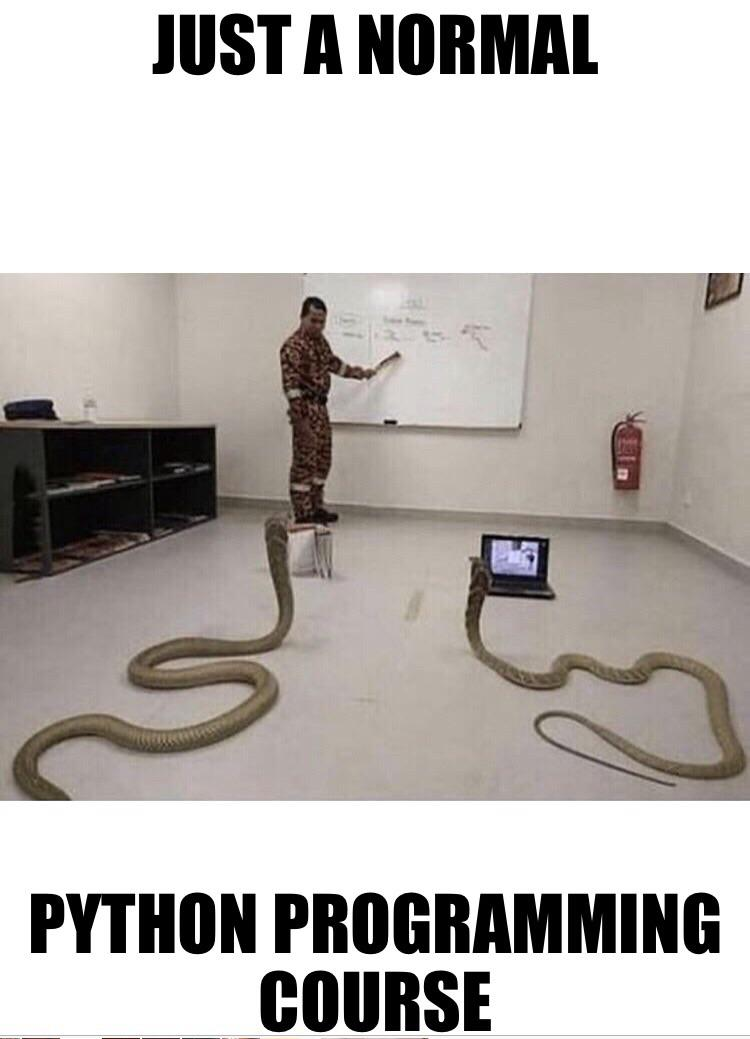

In [6]:
# Display an image in Jupyter notebook
from IPython.display import Image

display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))


In [7]:
# recreate your pokemon class here
import requests
        
class Pokemon:
    def __init__(self, name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = None
        # add a new image attribute
        self.image = None
        self.poke_api_call()

    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name.lower()}")
        if r.status_code == 200:
            pokemon = r.json()
        else:
            print(f"Please check pokemon name spelling and try again: {r.staus_code}")
            return

        self.name = pokemon["name"]
        self.types = [type_["type"]["name"] for type_ in pokemon["types"]]
        self.weight = pokemon["weight"]
        self.abilities = [pokebility["ability"]["name"] for pokebility in pokemon["abilities"]]
        # set image attribute
        self.image = pokemon["sprites"]["other"]["dream_world"]["front_default"]
        print(f"{self.name}'s data has been updated!")

    # create method to display image
    def display(self):
        display(Image(url=self.image))


    def __repr__(self): #string representation of our object, if not provided we get the object loaction in memory instead
        return f"You caught a {self.name.title()}"

In [8]:
charizard = Pokemon("charizard")
charizard.display()
print(charizard)

charizard's data has been updated!


You caught a Charizard


## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

Now let's evolve a few

In [9]:
import requests
# recreate your pokemon class here
import requests
        
class Pokemon:
    def __init__(self, name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = None
        # add a new image attribute
        self.image = None
        self.poke_api_call()

    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name.lower()}")
        if r.status_code == 200:
            pokemon = r.json()
        else:
            print(f"Please check pokemon name spelling and try again: {r.staus_code}")
            return

        self.name = pokemon["name"]
        self.types = [type_["type"]["name"] for type_ in pokemon["types"]]
        self.weight = pokemon["weight"]
        self.abilities = [pokebility["ability"]["name"] for pokebility in pokemon["abilities"]]
        # set image attribute
        self.image = pokemon["sprites"]["other"]["dream_world"]["front_default"]
        print(f"{self.name}'s data has been updated!")

    # create method to display image
    def display(self):
        display(Image(url=self.image))


    def __repr__(self): #string representation of our object, if not provided we get the object loaction in memory instead
        return f"You caught a {self.name.title()}"                                             

In [18]:
## Evolver class should inherit pokemon class
from time import sleep

class Evolver(Pokemon):
    def __init__(self, name):
        super().__init__(name)

    def evolve(self):
        # api call to the pokemon species endpoint
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon-species/{self.name.lower()}")
        if r.status_code == 200:
            pokemon_species = r.json()
        else:
            print(f"Ran into an issue, please check your pokemon's name: {r.status_code}")
            return
        r = requests.get(pokemon_species["evolution_chain"]["url"])
        if r.status_code == 200:
            ev_chain = r.json()
            ev_chain = ev_chain["chain"]
        else:
            print(f"Ran into an issue, please check your pokemon's name: {r.status_code}")
            return

        base_name = ev_chain["species"]["name"]
        evolution = ev_chain["evolves_to"][0]
        evolution_name = evolution["species"]["name"]

        # Evolution 1
        if base_name == self.name:
            pass
        # evolution 2
        elif evolution_name == self.name:
            evolution_name = evolution["evolves_to"][0]["species"]["name"]
        # attempting another evolution
        else:
            print(f"You can not evolve your {self.name} any further.....")
            return

        print("......")
        sleep(2)
        print(f"Your {self.name} is evolving?!?!?")
        self.display()
        sleep(2)
        print("......")
        print(f"Congratulations! Your {self.name} has evolved to....")
        self.name = evolution_name
        self.poke_api_call()
        print(f"{self.name.title()}!!!!!")
        self.display()

In [19]:
bulbasaur = Evolver("charmander")
print(bulbasaur.name)
print(bulbasaur.abilities)


charmander's data has been updated!
charmander
['blaze', 'solar-power']


In [21]:
bulbasaur.evolve()

......
Your charmeleon is evolving?!?!?


......
Congratulations! Your charmeleon has evolved to....
charizard's data has been updated!
Charizard!!!!!


#  Final Exercise: <br> <br>Create a Move_Tutor Class that in herits from the Pokemon parent class.

<p>This class should have a list attribute (move_list) that holds pokemon moves which should be populated with an api call to the PokeApi moves section  (just like we did with abilities and types in the Pokemon class example). Finally create a class method that teaches your pokemon up to 4 moves. This method should take in a user input to what move they would like to teach and do a membership inside the move_list. If the move exists inside the move_list the pokemon can learn that move and append to the final taught_moves list. </p> 



In [48]:
import requests
class Move_Tutor(Pokemon):
    def __init__(self, name):
        super().__init__(name)
        self.name = name
        self.move_list = []
        self.taught_moves = []
        
    def teach_move(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name.lower()}")
        if r.status_code == 200:
            pokemon = r.json()
        else:
            print(f"Please check pokemon move list and try again: {r.staus_code}")
            return

        self.name = pokemon["name"]
        self.move_list = [pokemoves["move"]["name"] for pokemoves in pokemon["moves"]]

        for moves in range(4):
            moves_teach = input(f"Enter what move you want learn {self.name} or stop")

            if moves_teach == "stop":
                break

            if moves_teach in self.move_list:
                self.taught_moves.append(moves_teach)
                print(f"{self.name} learned new {moves_teach}!")

            else:
                print(f"{moves_teach} is not valid! Please try again.")
                
pikachu = Move_Tutor("pikachu")
pikachu.teach_move()

 

pikachu's data has been updated!


Enter what move you want learn pikachu or stop mega-punch


pikachu learned new mega-punch!


Enter what move you want learn pikachu or stop fire


fire is not valid! Please try again.


Enter what move you want learn pikachu or stop stop


NameError: name 'pikachu' is not defined

In [ ]:
pikachu.show_moves()